<a href="https://colab.research.google.com/github/MayraMateo0/Clasificacion-de-piezas-met-licas-CNN-PCA/blob/main/Copia_de_red_final%2Bpca_reciente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from numpy import *
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn import decomposition
import time
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from tensorflow.keras.models import load_model
import tensorflow as tf
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Nadam, Adam
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
import sys
from keras import optimizers

from keras import backend as K
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.linalg import eigh

from sklearn.pipeline import make_pipeline
from keras.utils.np_utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
K.clear_session()

from keras.layers.pooling import AveragePooling2D

from sklearn.preprocessing import LabelBinarizer

from imutils import paths


import argparse
import pickle
import cv2

from sklearn.utils.multiclass import unique_labels
import efficientnet.keras as enet

from tensorflow.keras.applications.resnet import ResNet50

from google.colab import drive
import pandas as pd
import itertools


from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
import seaborn as sns
 

In [9]:
#!pip install -U segmentation-models

In [10]:

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
dirname=os.path.join('/content/gdrive/MyDrive/Colab Notebooks/data/entrenamiento')

leyendo imagenes de  /content/gdrive/MyDrive/Colab Notebooks/data/entrenamiento/
/content/gdrive/MyDrive/Colab Notebooks/data/entrenamiento/clavo 1
/content/gdrive/MyDrive/Colab Notebooks/data/entrenamiento/rectangulo 200
/content/gdrive/MyDrive/Colab Notebooks/data/entrenamiento/cuadrado 200
/content/gdrive/MyDrive/Colab Notebooks/data/entrenamiento/rondana 200
/content/gdrive/MyDrive/Colab Notebooks/data/entrenamiento/circulo 200
/content/gdrive/MyDrive/Colab Notebooks/data/entrenamiento/tuerca 200
Directorios leidos: 6
Imagenes en cada directorio [201, 200, 200, 200, 200, 199]
suma Total de imagenes en subdirs: 1200
Cantidad etiquetas creadas:  1200
0 clavo
1 rectangulo
2 cuadrado
3 rondana
4 circulo
5 tuerca
Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]
(720, 784) (720,) (720, 784)
Eigenvectors 
[[ 0.03133705+0.j -0.02959214+0.j -0.03788506+0.j ...  0.00405336+0.j
  -0.00463564+0.j  0.0072638 +0.j]
 [ 0.03143285+0.j -0.03036953+0.j -0.03780806+0.j ... -0.00618131+0.j

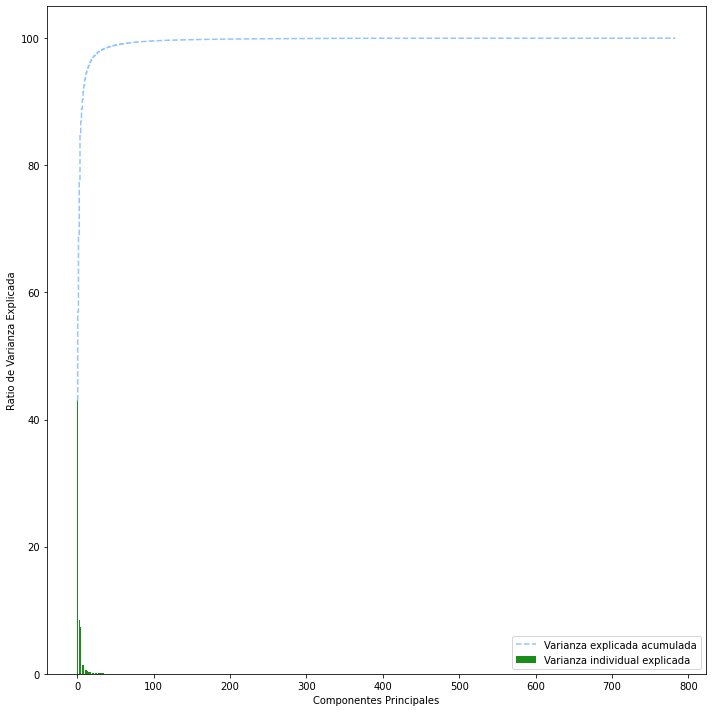

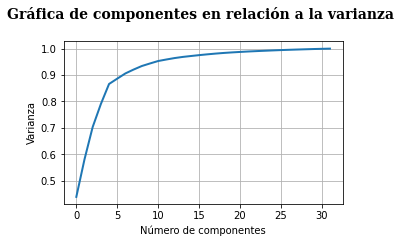

(720, 28, 28, 1) (720,)
Shape of ytrain after encoding:  (720, 6)
Training data shape :  (1080, 150, 150, 3) (1080,)
Testing data shape :  (120, 150, 150, 3) (120,)
Found 1200 files belonging to 6 classes.
Using 1199 files for training.
Found 480 files belonging to 6 classes.
Using 0 files for validation.
(1199, 150, 150, 3)
(1199,)
Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 102.1715 - accuracy: 0.1935 - val_loss: 1380.1085 - val_accuracy: 0.1667
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 2623.7739 - accuracy: 0.1685 - val_loss: 1256.0563 - val_accuracy: 0.1667
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 2138.7683 - accuracy: 0.1751 - val_loss: 768.3984 - val_accuracy: 0.1792
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 1347.2860 - accuracy: 0.2168 - val_loss: 482.9396 - val_accuracy: 0.3292
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 888.4610 - accuracy: 0.2435

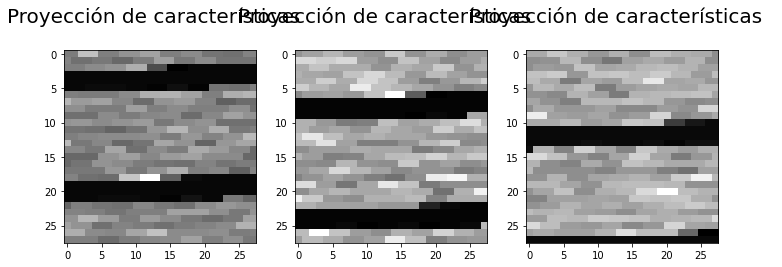

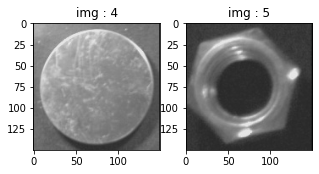

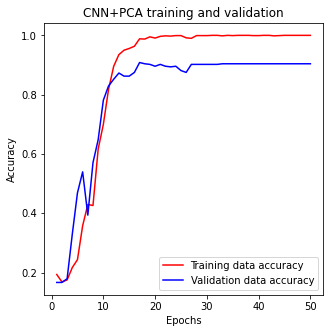

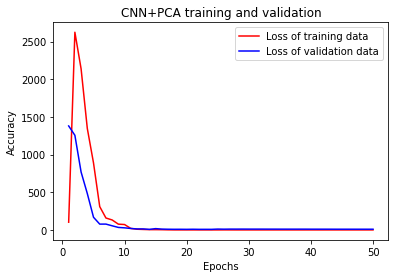

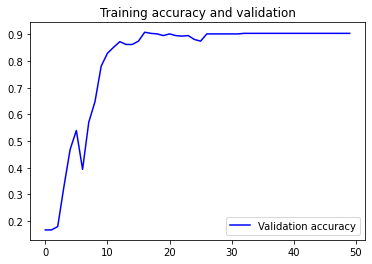

<Figure size 432x288 with 0 Axes>

Found 120 images belonging to 6 classes.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 2 1 1 1 1 1 1 2 0 1 2 2 1
 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5]
Training data shape :  (1080, 150, 150, 3) (1080,)
Testing data shape :  (120, 150, 150, 3) (120,)
[[20  0  0  0  0  0]
 [ 1 12  7  0  0  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 20]]
0.9333333333333333


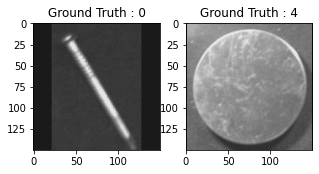

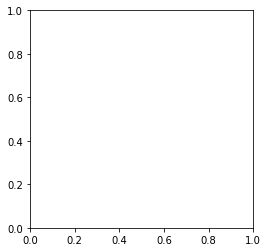

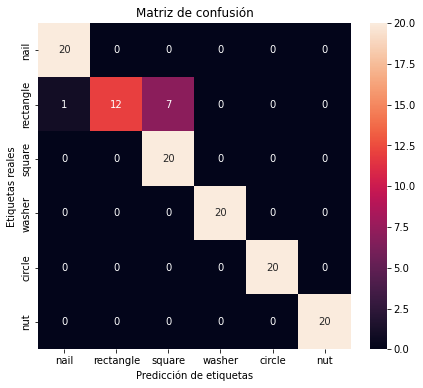

In [12]:
num = 1

##########################crea vector tamaño num para los datos
n = 0 ##sirve de contador

datos = [0 for x in range(num)] ## 

dataAccuracy = [0 for x in range(num)]
dataSensibilidad = [0 for x in range(num)]
dataPrecision = [0 for x in range(num)]
dF1 = [0 for x in range(num)]

##########################
for _ in itertools.repeat(None, num):
  imgpath = dirname + os.sep 
  images = []
  directories = []
  dircount = []
  prevRoot=''
  cant=0
  
  print("leyendo imagenes de ",imgpath)

  for root, dirnames, filenames in os.walk(imgpath):
      for filename in filenames:
          if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
              cant=cant+1
              filepath = os.path.join(root, filename)
              image = plt.imread(filepath)
              images.append(image)
              b = "Leyendo..." + str(cant)
              print (b, end="\r")
              if prevRoot !=root:
                  print(root, cant)
                  prevRoot=root
                  directories.append(root)
                  dircount.append(cant)
                  cant=0
  dircount.append(cant)
  if len(dircount) > 1:
      dircount = dircount[1:]
      dircount[0] = dircount[0] + 1
  print('Directorios leidos:',len(directories))
  print("Imagenes en cada directorio", dircount)
  print('suma Total de imagenes en subdirs:',sum(dircount))

  num_capas=64
  optimizador='nadam'
  componentes=32

  labels=[]
  indice=0
  for cantidad in dircount:
        for i in range(cantidad):
            labels.append(indice)
        indice=indice+1
  print("Cantidad etiquetas creadas: ",len(labels))

  deportes=[]
  indice=0
  for directorio in directories:
      name = directorio.split(os.sep)
      print(indice , name[len(name)-1])
      deportes.append(name[len(name)-1])
      indice=indice+1

  y = np.array(labels)
  X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

 
  classes = np.unique(y)
  nClasses = len(classes)
  print('Total number of outputs : ', nClasses)
  print('Output classes : ', classes)

  train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.4, train_size=0.6, random_state=13)
  train_X = np.resize(train_X,(720,784))
  test_X = np.resize(test_X,(720,784))

  print(train_X.shape, train_Y.shape, test_X.shape)

  train_X = train_X/255
  test_X = test_X/255


  standardized_scalar = StandardScaler()

  standardized_data = standardized_scalar.fit_transform(train_X)
  standardized_data.shape


  cov_matrix = np.matmul(standardized_data.T, standardized_data)
  cov_matrix.shape

  lambdas, vectors = eigh(cov_matrix, eigvals=(782, 783))
  vectors.shape

  cov_mat = np.cov(standardized_data.T)

  eig_vals, eig_vecs = np.linalg.eig(cov_mat)

  print('Eigenvectors \n%s' %eig_vecs)
  print('\nEigenvalues \n%s' %eig_vals)


  #  Hacemos una lista de parejas (autovector, autovalor) 
  eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

  # Ordenamos estas parejas den orden descendiente con la función sort
  eig_pairs.sort(key=lambda x: x[0], reverse=True)

  # Visualizamos la lista de autovalores en orden desdenciente
  print('Autovalores en orden descendiente:')
  for i in eig_pairs:
      print(i[0])

  # A partir de los autovalores, calculamos la varianza explicada
  tot = sum(eig_vals)
  var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
  cum_var_exp = np.cumsum(var_exp)

  # Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
  with plt.style.context('seaborn-pastel'):
      plt.figure(figsize=(10, 10))

      plt.bar(range(784), var_exp, alpha=0.9, align='center',label='Varianza individual explicada', color='g')
      plt.step(range(784), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
      plt.ylabel('Ratio de Varianza Explicada')
      plt.xlabel('Componentes Principales')
      plt.legend(loc='best')
      plt.tight_layout()

  #Generamos la matríz a partir de los pares autovalor-autovector
  matrix_w = np.hstack((eig_pairs[0][1].reshape(784,1),
                        eig_pairs[1][1].reshape(784,1)))

  print('Matriz W:\n', matrix_w)

  Y = standardized_data.dot(matrix_w)

  vectors = vectors.T
  vectors.shape

  train_X.shape

  
  new_coordinates = np.matmul(vectors, standardized_data.T)
  print(new_coordinates.shape)

  new_coordinates = np.vstack((new_coordinates, train_Y)).T
  df_new = pd.DataFrame(new_coordinates, columns=["f1", "f2", "etiquetas"])
  df_new.head()
  
  

  pca = decomposition.PCA()
  pca.n_components = componentes
  pca_data = pca.fit_transform(standardized_data)
  percent_variance_retained = pca.explained_variance_ / np.sum(pca.explained_variance_)
  
  cum_variance_retained = np.cumsum(percent_variance_retained)
  print("varianza acumulada",cum_variance_retained)
  plt.figure(2, figsize=(5, 3))
  plt.clf()
  plt.plot(cum_variance_retained, linewidth=2)
  plt.axis("tight")
  plt.title("Gráfica de componentes en relación a la varianza \n", 
            fontdict={'family': 'serif', 
                      'color' : 'black',
                      'weight': 'bold',
                      'size': 14})
  plt.grid()
  plt.xlabel("Número de componentes", fontsize=10)
  plt.ylabel("Varianza", fontsize=10)
  plt.savefig("pca_cumulative_variance.png")
  plt.show()

  train_X = np.array(train_X)
  train_Y = np.array(train_Y)

  plt.figure(figsize=(20,4))
  for index, (image, label) in enumerate(zip(train_X[1:4], train_Y[1:4])):
      plt.subplot(1, 5, index + 1)
      plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
      plt.title('Proyección de características  \n' % label, fontsize = 20)

  train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
  print(train_X.shape, train_Y.shape)

  nclasses = train_Y.max() - train_Y.min() + 1
  train_Y = to_categorical(train_Y, num_classes = nclasses)
  print("Shape of ytrain after encoding: ",train_Y.shape)

  train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.1)
  print('Training data shape : ', train_X.shape, train_Y.shape)
  print('Testing data shape : ', test_X.shape, test_Y.shape)


  plt.figure(figsize=[5,5])

  plt.subplot(121)
  plt.imshow(train_X[0,:,:], cmap='gray')
  plt.title("img : {}".format(train_Y[0]))

  plt.subplot(122)
  plt.imshow(test_X[0,:,:], cmap='gray')
  plt.title("img : {}".format(test_Y[0]))

  plt.figure(figsize=[5,5])



  train_X = train_X.astype('float32')
  test_X = test_X.astype('float32')
  train_X = train_X / 255.
  test_X = test_X / 255.
  ###aq
  batch_size = 1200
  img_height = 150
  img_width = 150

  data_dir='/content/gdrive/MyDrive/Colab Notebooks/data/entrenamiento'
  data_val='/content/gdrive/MyDrive/Colab Notebooks/data/validacion'
  
  
  entrenamiento_datagen = ImageDataGenerator(

      rotation_range=5,
      rescale=1./255,        # Normalizar la imagen
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True
      
      )

  
  test_datagen = ImageDataGenerator(rescale=1. / 255)

  test_datagen = ImageDataGenerator()
  ds_entrena = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.001,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

    
  ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    data_val,
    validation_split=0.001,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


  for image_batch, labels_batch in ds_entrena:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


  
  #definir el modelo
  num_classes = 6

  model = tf.keras.Sequential([

    #tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(10, (4,4), activation='relu', input_shape=(150, 150,3)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPooling2D(pool_size=(4,4)),

  tf.keras.layers.Conv2D(num_capas, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(784, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(num_classes, activation='softmax')
  ])
  ###compilar el modelo
  model.compile(
  optimizer=optimizador,
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

 

  inicio = time.time()

  history=model.fit(
    ds_entrena,
    validation_data=ds_val,
    epochs=50
  )

  fin = time.time()
  print('Tiempo:',fin-inicio)

  target_dir = '/content/gdrive/MyDrive/Colab Notebooks/modelo_PCA/'
  if not os.path.exists(target_dir):
    os.mkdir(target_dir)
  model.save('/content/gdrive/MyDrive/Colab Notebooks/modelo_PCA/modelo.h5')
  model.save_weights('/content/gdrive/MyDrive/Colab Notebooks/modelo_PCA/pesos.h5')

  test_eval = model.evaluate(ds_entrena, verbose=5)

  print('Test loss:', test_eval[0])
  print('Test accuracy:', test_eval[1])


  history_dict = history.history
  print(history_dict.keys())

  acc      = history.history[     'accuracy' ]
  val_acc  = history.history[ 'val_accuracy' ]
  loss     = history.history[    'loss' ]
  val_loss = history.history['val_loss' ]
  

  epochs   = range(1,len(acc)+1,1)





 


  plt.plot ( epochs,     acc, 'r', label='Training data accuracy'  )
  plt.plot ( epochs, val_acc,  'b', label='Validation data accuracy')
  plt.title ('CNN+PCA training and validation')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')

  plt.legend()
  plt.figure()

  plt.plot ( epochs,     loss, 'r', label='Loss of training data'  )
  plt.plot ( epochs, val_loss,  'b', label='Loss of validation data')
  plt.title ('CNN+PCA training and validation'   )
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')

  plt.legend()
  plt.figure()

  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  epocas=range(len(acc))
  #plt.plot(epocas,acc,'r',label='Precisión entrenamiento')
  plt.plot(epocas,val_acc,'b',label='Validation accuracy')
  plt.title('Training accuracy and validation')
  plt.legend(loc=0)
  plt.figure()
  plt.show()

  
  get_ipython().run_line_magic('matplotlib', 'inline')
  # In[19]:

  width_shape = 150
  height_shape = 150
  batch_size = batch_size

  names = [ "nail", "rectangle", "square", "washer", "circle", "nut"]
  


  #test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/regulares/8M/2000lx"
  #test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/regulares/8M/1500lx_8M"
  #test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/regulares/8M/1000lx_8M"
  #test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/data/validacion"
  #test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/regulares/1.3M/1000lx"
  #test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/regulares/1.3M/1500lx"
  #test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/regulares/1.3M/2000lx"



  #test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/Irregulares/irregulares1.3M/1000lx"
  #test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/Irregulares/irregulares1.3M/1500lx"
  #test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/Irregulares/irregulares1.3M/2000lx"



  #test_data_dir="/content/gdrive/MyDrive/Colab Notebooks/mezcla_val_min/8M/1000lx_8M"
  #test_data_dir="/content/gdrive/MyDrive/Colab Notebooks/mezcla_val_min/8M/1500lx_8M"
  #test_data_dir="/content/gdrive/MyDrive/Colab Notebooks/mezcla_val_min/8M/2000lx"

  #test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/mezcla_val/1.3M/1000lx"
  test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/mezcla_val/1.3M/1500lx"
  #test_data_dir = "/content/gdrive/MyDrive/Colab Notebooks/mezcla_val/1.3M/2000lx"

  test_datagen = ImageDataGenerator()
  ds_val = test_datagen.flow_from_directory(
      test_data_dir,
      target_size=(img_height, img_width), 
      batch_size = batch_size,
      class_mode='categorical', 
      shuffle=False)


  custom_Model= load_model("/content/gdrive/MyDrive/Colab Notebooks/modelo_PCA/modelo.h5")

  predictions = custom_Model.predict_generator(generator=ds_val)

  y_pred = np.argmax(predictions, axis=1)
  y_real = ds_val.classes

  print(y_real)
  print(y_pred)

  train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.1)
  print('Training data shape : ', train_X.shape, train_Y.shape)
  print('Testing data shape : ', test_X.shape, test_Y.shape)
  # In[6]:

  plt.figure(figsize=[5,5])

  # Display the first image in training data
  plt.subplot(121)
  plt.imshow(train_X[0,:,:], cmap='gray')
  plt.title("Ground Truth : {}".format(train_Y[0]))

  # Display the first image in testing data
  plt.subplot(122)
  plt.imshow(test_X[0,:,:], cmap='gray')
  plt.title("Ground Truth : {}".format(test_Y[0]))



  train_X = train_X.astype('float32')
  test_X = test_X.astype('float32')
  train_X = train_X / 255.
  test_X = test_X / 255.
  ###aq
  batch_size = batch_size
  img_height = 150
  img_width = 150

  data_dir='/content/gdrive/MyDrive/Colab Notebooks/data/entrenamiento'
  data_val='/content/gdrive/MyDrive/Colab Notebooks/data/validacion'
 
    


  
  y_pred = np.argmax(predictions, axis=1)

  matc=confusion_matrix(y_real, y_pred)


  fig, ax= plt.subplots(figsize=(4,4))
  ax.matshow(matc)

  plt.title('Confusion matrix CNN+PCA', fontsize=20)
  plt.ylabel("True labels", fontsize=15)
  plt.xlabel("Predicted labels", fontsize=15)
  for(i,j), z in np.ndenumerate(matc):
      ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color="black", fontsize=15)
  plt.imshow(matc, interpolation='nearest', cmap='Pastel1')


     
  y_pred = np.argmax(predictions, axis=1)

  matc=confusion_matrix(y_real, y_pred)
  ax= plt.subplot()
  fig, ax= plt.subplots(figsize=(7,6))

  sns.heatmap(matc, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicción de etiquetas');ax.set_ylabel('Etiquetas reales'); 
  ax.set_title('Matriz de confusión'); 
  ax.xaxis.set_ticklabels(["nail", "rectangle", "square", "washer", "circle", "nut"], fontsize=10);
  ax.yaxis.set_ticklabels(["nail", "rectangle", "square", "washer", "circle", "nut"], fontsize=10);

  report = classification_report(y_real, y_pred, output_dict=True)




  
  cm=confusion_matrix(y_real, y_pred)

  print(cm)

  print( accuracy_score(y_real, y_pred))




 

  #######################:3

  n = n+1 #incrementa n para en la siguientre iteracion escriba en el siguiente espacio

